In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
df1 = pd.read_csv(r'C:\Users\aacjp\dsc-phase-1-project-online\zippedData\imdb.title.ratings (1).csv.gz')
df2 = pd.read_csv(r'C:\Users\aacjp\Downloads\imdb.name.basics (1).csv.gz')
df3 = pd.read_csv(r'C:\Users\aacjp\dsc-phase-1-project-online\zippedData\bom.movie_gross (3).csv.gz')
df4 = pd.read_csv(r'C:\Users\aacjp\Downloads\tmdb.movies (1).csv.gz')
df5 = pd.read_csv(r'C:\Users\aacjp\Downloads\tn.movie_budgets (1).csv.gz')
df6 = pd.read_csv(r'C:\Users\aacjp\dsc-phase-1-project-online\zippedData\imdb.title.basics (1).csv.gz')

# Question 1

1. Which studio is earned the most revenue? how does this number compare to the gross revenue of the next 9 highest earners?

Conclusions: BV(Buena Vista) is ahead by far, the next 3 (warner bros, fox, and universal) are relativley close
to BV but gross drops off significantly after the top 4

Reccomendation: Microsoft should aim to model themselves similarly to to Buena Vista studios. This could mean hiring people from this studio or buying a series from them much like how disney bought up star wars.

In [2]:
mean = np.mean(df3['domestic_gross'])
df3['filled_revenue'] = df3['domestic_gross'].fillna(mean)
studios = list(df3['studio'])

#finding the highest earning studio
def get_studio(x, data, xvar, yvar, y2var, y2):
    y_by_x = []
    for i in range(len(x)):
        if data[y2var][i] == y2:
            y_by_x.append(sum(list(data.loc[data[xvar] == str(x[i])][yvar])))
    
    ix = []
    for i in range(len(y_by_x)):
        if y_by_x[i] == max(y_by_x):
            ix.append(i)
            
    x_tie = []
    for i in range(len(ix)):
        ixer = ix[i]
        x_tie.append(studios[ixer])
    return x_tie[0], max(y_by_x) * len(x_tie)
studio = get_studio(studios, df3, 'studio', 'filled_revenue', 'year', 2018)
print(f'The highest earner was {studio[0]}. This studio earned ${round(studio[1] /100000000000, 2)} billion in domestic revenue in 2018!')

The highest earner was BV. This studio earned $1.84 billion in domestic revenue in 2018!


In [3]:
#creating a dataset for plotting
unique_studios = list(df3['studio'].unique())
dom = []
for i in range(len(unique_studios)):
    dom.append(sum(df3.loc[df3['studio'] == unique_studios[i]]['filled_revenue']))
    
studio_df = pd.DataFrame(unique_studios)
revenue_df = pd.DataFrame(dom)
merged = pd.concat([studio_df, revenue_df], axis='columns')
merged.columns = ['studio', 'domestic gross ($billions)']
top10 = merged.nlargest(10, 'domestic gross ($billions)') 

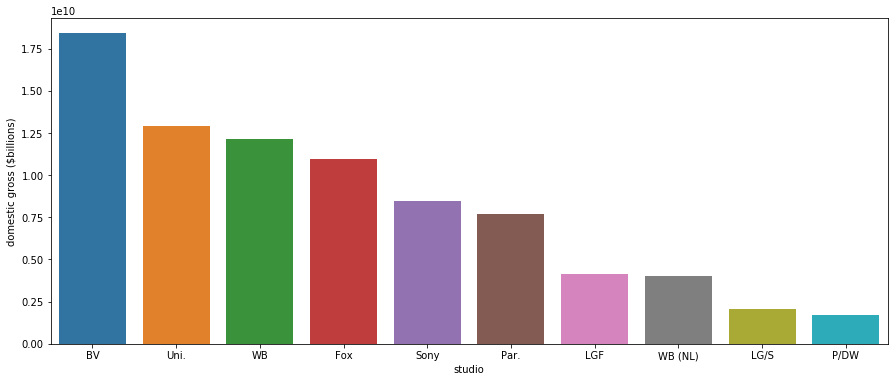

In [4]:
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='studio', y='domestic gross ($billions)', ax=ax, data=top10) 
#reccomendation: it is best to film your movie at one of these studios as they are more established and generate more revenue

# Question 2

2. How does budget correlate with revenue, is it positive like we may think? and how strong is the correlation if any?

using the correlation formula and sklearn linear regression model we were able to determine a positive correlation between budget and revenue

reccomendation: with this knowledge it would be benefical for Microsoft to invest at least $500,000,000 into each film. because it is at that point and higher that higher budget films begin to stand out.

In [5]:
#converting budgets and worldwide gross into lists of ints
budget_ints = []
wwgross_ints = []
for i in range(len(df5)):
    budget_ints.append(int(df5['production_budget'][i].replace('$', '').replace(',', '')))
    wwgross_ints.append(int(df5['worldwide_gross'][i].replace('$', '').replace(',', '')))         

In [6]:
def correlation(x, y):
    n = len(x)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    x_diffs = [i-mean_x for i in x]
    y_diffs = [i-mean_y for i in y]
    numerator = np.dot(x_diffs, y_diffs)
    denominator = np.sqrt(np.dot(x_diffs, x_diffs)*np.dot(y_diffs, y_diffs))
    return np.round(denominator/numerator, 2)

In [7]:
bre_corr = correlation(budget_ints, wwgross_ints)

In [8]:
print(f'budget and revenue are positivley correlated, with a correlation of {bre_corr}.')
#reccomendation: Maximize your budget as it makey your movie much more likley to earn more revenue

budget and revenue are positivley correlated, with a correlation of 1.34.


In [9]:
#creating a df containing only budget, x and gross, y for sklearn to preform Single Variable Regression
budget_df = pd.DataFrame(budget_ints)
revenue_df = pd.DataFrame(wwgross_ints)
merged = pd.concat([budget_df, revenue_df], axis='columns')
merged.columns = ['budget', 'gross_revenue']

In [56]:
x = merged.drop(['gross_revenue'], axis='columns')
y = merged.drop(['budget'], axis='columns')
model = LinearRegression()
model.fit(x,y)
round(model.coef_[0][0] ,2) , round(model.intercept_[0])
#y = 3.13x -7285667

(3.13, -7285667.0)

In [11]:
def trim_data(x_list, y_list):
    budget_df = pd.DataFrame(x_list)
    revenue_df = pd.DataFrame(y_list)
    merged = pd.concat([budget_df, revenue_df], axis='columns')
    merged.columns = ['budget', 'gross revenue']
    return merged

trimmed = trim_data(budget_ints, wwgross_ints)

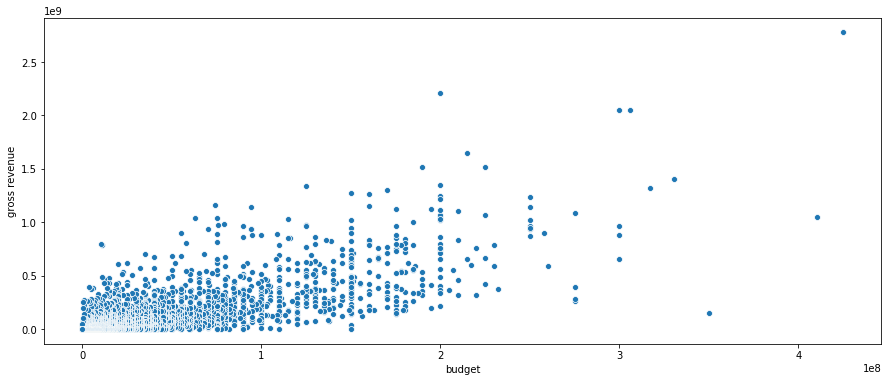

In [12]:
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.scatterplot(x='budget', y='gross revenue', data=trimmed)

# Question 3

3. What were the top 5 highest earning films, and what percentage of worldwide gross did they make up?

Conclusion: The top 5 films were Star Wars Ep. VII: The Force Awakens, Avatar, Black Panther, Avengers: Infinity War, and the Titanic, these films acount for 1.54% of worldwide gross revenue. All of them were action films

Reccomendation: for maximal revenue microsoft should make an action/adventure film and consider hiring actors that starred in these films

In [13]:
years = []
dom_revenues = []
ww_revenues = []
movie_list = []
for i in range(len(df5)):
    years.append(int(df5['release_date'][i][-4:]))
    dom_revenues.append(int(df5['domestic_gross'][i].replace('$', '').replace(',', '')))
    ww_revenues.append(int(df5['worldwide_gross'][i].replace('$', '').replace(',', '')))
    movie_list.append(df5['movie'][i])
    
df5['release_date'] = years
df5['domestic_gross'] = dom_revenues
df5['worldwide_gross'] = ww_revenues
df5['movies'] = movie_list

In [14]:
new_df = pd.concat([df5.release_date, df5.domestic_gross, df5.worldwide_gross, df6.genres, df4.popularity, df5.movies, df4.vote_average, df4.vote_count], axis='columns')

In [15]:
def get_movies(data, filter_name, filter_value, y):
    temp_df = data.loc[data[filter_name] == filter_value]
    average = round(temp_df[y].mean() ,1)
    return average

def get_genres(data, filter_name, filter_value, y1, y2, y3, y4):
    temp_df = data.loc[data[filter_name] == filter_value]
    output1 = list(temp_df[y1])[0]
    output2 = float(temp_df[y2])
    output3 = str(temp_df[y3])[5:-28]
    output4 = filter_value
    output5 = int(temp_df['worldwide_gross'])
    return output1, output2, output3, output4, output5

In [16]:
#3. Which movie earned the highest domestic revenue? what was it's popularity and genre? answer the same question for worldwide revenue
film = get_genres(new_df, 'domestic_gross', max(new_df['domestic_gross']), 'genres', 'popularity', 'movies', 'worldwide_gross')

In [17]:
avg_rating_2018 = get_movies(new_df, 'release_date', 2018, 'vote_average')
avg_count_2018 = get_movies(new_df, 'release_date', 2018, 'vote_count')
avg_rating_2017 = get_movies(new_df, 'release_date', 2017, 'vote_average')
avg_count_2017 = get_movies(new_df, 'release_date', 2017, 'vote_count')

In [18]:
sum_gross = []
for i in range(len(df5)):
    sum_gross.append(list(df5['domestic_gross'])[i] + list(df5['domestic_gross'])[i])
    
df5['sum_gross'] = sum_gross
top_5 = sorted(sum_gross)[-5:]
top5_titles = []
revenues = []
for i in range(5):
    top5_titles.append(list(df5.loc[df5['sum_gross'] == top_5[i]]['movie']))
    revenues.append(int(df5.loc[df5['sum_gross'] == top_5[i]]['sum_gross']))

In [19]:
tot_gross = []
for i in range(len(df5)):
    tot_gross.append(df5['sum_gross'][i])

In [20]:
for i in range(5):
    print(f'{i+1}. {top5_titles[(i+1)*-1][0]}')
    
print(f'These films acount for {round((sum(revenues) / sum(tot_gross)) * 100, 2)}% of worldwide gross revenue.')

1. Star Wars Ep. VII: The Force Awakens
2. Avatar
3. Black Panther
4. Avengers: Infinity War
5. Titanic
These films acount for 1.54% of worldwide gross revenue.


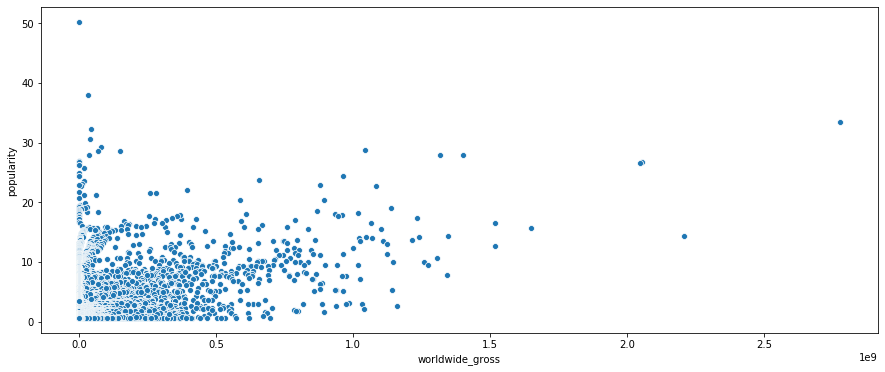

In [21]:
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(x='worldwide_gross', y='popularity', data=new_df)

# Question4

4. How many reviews is average for a movie, and how that was the average film rated?

Conclusion: In 2018 the average movie was rated 5.8 and had 404.6 ratings, these values were a decline from the previous year.
reccomendations: Microsoft should set a benchmark to have an average rating of 6.5 or higher, in all honesty this is a somewhat arbirtrary value but the point is that they don't need an 8 or 9 out of ten to be cosidered 'good'

In [22]:
print(f'In 2018 the average movie was rated {avg_rating_2018} and had {avg_count_2018} ratings. A decline from 2017 when the averages were {avg_rating_2017} and {avg_count_2017} respectivley')

In 2018 the average movie was rated 5.8 and had 404.6 ratings. A decline from 2017 when the averages were 6.0 and 701.4 respectivley


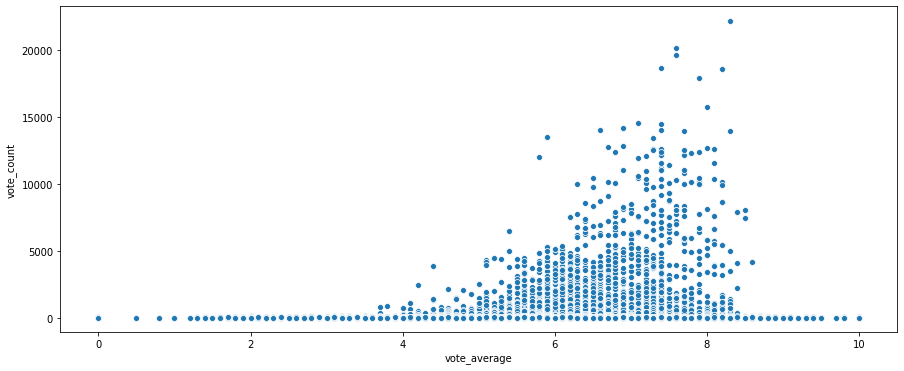

In [23]:
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(x='vote_average', y='vote_count', data=new_df)

In [24]:
filler = np.mean(df6['runtime_minutes'].dropna())
df6['runtime_minutes'] = df6['runtime_minutes'].fillna(round(filler))
df6

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,86.0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,86.0,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,86.0,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


# Question5

5. With the increrase in social media and many forms of shorter entertainment in the recent years people's attention spans have a tendancy to be shorter, songs and ads are getting shorter, is this the same for movies?

conclusion: not really, the average runtimes have consistently stayed within the 80-90 minute mark throughout the 2010's

Reccomendation: making shorter movies for the audiences is not necessary, movies are still doing fine at 80 - 90 minutes
and there is no need to squeeze a movie in a shorter amount of time

In [23]:
r2018 = []
r2017 = []
r2016 = []
r2015 = []
r2014 = []
r2013 = []
r2012 = []
r2011 = []
r2010 = []
for i in range(len(df6)):
    if df6['start_year'][i] == 2018:
        r2018.append(df6['runtime_minutes'][i])
    if df6['start_year'][i] == 2017:
        r2017.append(df6['runtime_minutes'][i])
    if df6['start_year'][i] == 2016:
        r2016.append(df6['runtime_minutes'][i])
    if df6['start_year'][i] == 2015:
        r2015.append(df6['runtime_minutes'][i])
    if df6['start_year'][i] == 2014:
        r2014.append(df6['runtime_minutes'][i])
    if df6['start_year'][i] == 2013:
        r2013.append(df6['runtime_minutes'][i])
    if df6['start_year'][i] == 2012:
        r2012.append(df6['runtime_minutes'][i])
    if df6['start_year'][i] == 2011:
        r2011.append(df6['runtime_minutes'][i])
    if df6['start_year'][i] == 2010:
        r2010.append(df6['runtime_minutes'][i])  
        
years = [r2018, r2017, r2016, r2015, r2014, r2013, r2012, r2011, r2010]

In [24]:
average_runtimes = []
start_years = []
for i in range(9):
    average_runtimes.append(round(np.mean(years[i])))
    start_years.append(i + 2010)

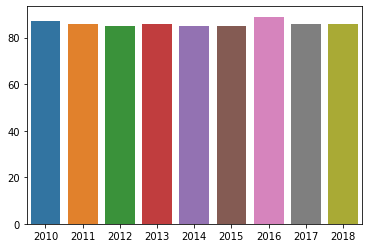

In [25]:
sns.barplot(x=start_years, y=average_runtimes)